# Mixed effect model test 
same model run below code in R

```
lme<-lmer(y ~ x + (1+x|subject), data = lmm.data)
```

## prepare data

(array([ 0.085     ,  0.265     ,  0.        ,  0.36      ,  0.        ,
         0.38      ,  0.28666667,  0.        ,  0.16666667,  0.        ,
         0.07166667,  0.02833333,  0.        ,  0.02      ,  0.00333333]),
 array([ 0. ,  0.6,  1.2,  1.8,  2.4,  3. ,  3.6,  4.2,  4.8,  5.4,  6. ,
         6.6,  7.2,  7.8,  8.4,  9. ]),
 <a list of 15 Patch objects>)

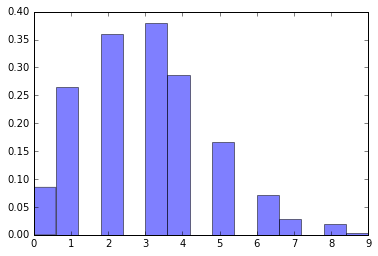

In [41]:
%matplotlib inline
from matplotlib import pylab as plt
plt.hist(np.random.poisson(size=1000,lam=3),normed=True, alpha=0.5,bins=15)
    

In [29]:
import statsmodels.formula.api as smf
import pandas as pd
import numpy as np
from copy import deepcopy
import statsmodels.api as sm


np.random.seed(seed=0)

x = np.random.normal(size=(100,3))
y = deepcopy(np.sum(x))*3 + np.random.poisson(size=100)
id = np.ones(100)
data1 = pd.DataFrame(np.column_stack([x,y,id]),columns=('x1','x2','x3','y','id'))
id = np.ones(100)
x = np.random.normal(size=(150,3))
y = deepcopy(np.sum(x))*2 + np.random.poisson(size=150)
id = np.ones(150)*2
data2 = pd.DataFrame(np.column_stack([x,y,id]),columns=('x1','x2','x3','y','id'))

data = pd.concat([data1,data2])
data = data.reset_index(drop=True)
print(data.mean(),data1.mean(),data2.mean())

(x1     0.004268
x2    -0.071144
x3    -0.094951
y    -47.492157
id     1.600000
dtype: float64, x1     0.100521
x2     0.106252
x3    -0.124184
y     25.736618
id     1.000000
dtype: float64, x1    -0.059900
x2    -0.189408
x3    -0.075463
y    -96.311340
id     2.000000
dtype: float64)


## mixed effect model

In [75]:

md = smf.mixedlm('y ~ x1 * x2 * x3', data, groups=data['id'], re_formula='~ x1 + x2 + x3')
mdf = md.fit(method='cg')
print(mdf.summary())


D:\Anaconda2\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


               Mixed Linear Model Regression Results
Model:                MixedLM     Dependent Variable:     y        
No. Observations:     250         Method:                 REML     
No. Groups:           2           Scale:                  64.6515  
Min. group size:      100         Likelihood:             -879.4460
Max. group size:      150         Converged:              Yes      
Mean group size:      125.0                                        
-------------------------------------------------------------------
                      Coef.  Std.Err.    z    P>|z|  [0.025  0.975]
-------------------------------------------------------------------
Intercept            -46.017    7.897  -5.827 0.000 -61.495 -30.540
x1                     4.587    2.281   2.011 0.044   0.116   9.059
x2                     8.442                                       
x1:x2                  0.672    0.541   1.244 0.214  -0.387   1.732
x3                    -0.770    3.104  -0.248 0.804  -6.855   5

<Response [200]>

In [22]:
md = smf.mixedlm('y ~ x', data, groups=data['id'], re_formula='~ x')
mdf = md.fit(method='lbfgs')
print(mdf.summary())

            Mixed Linear Model Regression Results
Model:               MixedLM  Dependent Variable:  y        
No. Observations:    250      Method:              REML     
No. Groups:          2        Scale:               1.0378   
Min. group size:     100      Likelihood:          -366.6305
Max. group size:     150      Converged:           Yes      
Mean group size:     125.0                                  
------------------------------------------------------------
                    Coef. Std.Err.   z   P>|z| [0.025 0.975]
------------------------------------------------------------
Intercept           0.020    0.634 0.031 0.975 -1.222  1.262
x                   2.465    1.396 1.766 0.077 -0.271  5.201
Intercept RE        0.835                                   
Intercept RE x x RE 1.799                                   
x RE                4.817                                   



D:\Anaconda2\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [23]:
md = smf.mixedlm('y ~ x', data, groups=data['id'], re_formula='~ x')
mdf = md.fit(method='bfgs')
print(mdf.summary())

            Mixed Linear Model Regression Results
Model:               MixedLM  Dependent Variable:  y        
No. Observations:    250      Method:              REML     
No. Groups:          2        Scale:               1.0378   
Min. group size:     100      Likelihood:          -366.6305
Max. group size:     150      Converged:           Yes      
Mean group size:     125.0                                  
------------------------------------------------------------
                    Coef. Std.Err.   z   P>|z| [0.025 0.975]
------------------------------------------------------------
Intercept           0.020    0.634 0.031 0.975 -1.222  1.262
x                   2.465    1.396 1.766 0.077 -0.271  5.201
Intercept RE        0.835                                   
Intercept RE x x RE 1.799                                   
x RE                4.817                                   



D:\Anaconda2\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [12]:
## OLS

In [19]:
olsm = smf.ols('y ~ x', data).fit()

%matplotlib inline
from matplotlib import pyplot as plt
print(olsm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     1034.
Date:                Sat, 06 May 2017   Prob (F-statistic):           1.98e-90
Time:                        17:47:58   Log-Likelihood:                -393.21
No. Observations:                 250   AIC:                             790.4
Df Residuals:                     248   BIC:                             797.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.0300      0.074      0.404      0.6